In [43]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [45]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

In [46]:
# Check content's type
type(PLAID_SECRET)

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [47]:
INSTITUTION_ID = "ins_109508"

In [48]:
# YOUR CODE HERE

# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

### 2. Generate a public token

In [49]:
# YOUR CODE HERE

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(institution_id=INSTITUTION_ID, initial_products=['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [50]:
# YOUR CODE HERE

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [51]:
# YOUR CODE HERE

# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'RvxeyvDdevuGBgxWl97jiZvAQvBKLJfRvzapB',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '6j9wbjEQwjiyeNxVqWpECq6mE6N1r8ugor8Dp',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'XvjNVvW7NvuKjyreW9LDf3y9ryaR7BTdW5bKq',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [52]:
# YOUR CODE HERE

# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

### 2. Print the categories for each transaction

In [53]:
# YOUR CODE HERE

# Print JSON output as example
print(json.dumps(transaction_response['transactions'],indent=4, sort_keys=True))

# Collapsed it because it wouldn't load properly to GitHub

[
    {
        "account_id": "DAdrzADbrAHaDyjkwqlzuAJ9yJrkqNivPz3Wa",
        "account_owner": null,
        "amount": 500,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2019-09-03",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [54]:
# YOUR CODE HERE

# Initialize transaction's categories variable
transaction_data = transaction_response['transactions']

# Create dataframe with the columns [date, name, amount, and category] from the JSON output and print preview
transactions_df=pd.DataFrame(data=transaction_data,columns=['date','name','amount','category'])
transactions_df.head()

,date,name,amount,category
0,2019-09-03,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
1,2019-09-01,Uber 072515 SF**POOL**,6.33,"[Travel, Car Service, Ride Share]"
2,2019-08-29,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
4,2019-08-28,KFC,500.00,"[Food and Drink, Restaurants]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [55]:
# Check dtype of date column for first five entries
transactions_df[:5]['date']

0    2019-09-03
1    2019-09-01
2    2019-08-29
3    2019-08-28
4    2019-08-28
Name: date, dtype: object

In [56]:
# Check dtype of amount column for first five entries
transactions_df[:5]['amount']

0     500.00
1       6.33
2     500.00
3    2078.50
4     500.00
Name: amount, dtype: float64

In [57]:
# YOUR CODE HERE

# Change dtype of date column for first five entries to datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df[:5]['date']

0   2019-09-03
1   2019-09-01
2   2019-08-29
3   2019-08-28
4   2019-08-28
Name: date, dtype: datetime64[ns]

In [58]:
# Set date as the index
transactions_df.set_index('date', inplace=True)
transactions_df.head()

,name,amount,category
date,,,
2019-09-03,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2019-09-01,Uber 072515 SF**POOL**,6.33,"[Travel, Car Service, Ride Share]"
2019-08-29,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2019-08-28,KFC,500.00,"[Food and Drink, Restaurants]"


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [59]:
# YOUR CODE HERE

# Set specific date range
year_income_start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
year_income_end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get income for past year
year_income = client.Income.get(access_token)

# Print all income information
year_income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'tsBit2t5ruGExBK'}

In [60]:
# Print gross income for past year
gross_yearly_income = year_income['income']['last_year_income_before_tax']
print(f"The gross income for the previous year was ${gross_yearly_income}.")

The gross income for the previous year was $7285.


In [61]:
# Initialize variable to access income_streams list
income_streams = year_income['income']['income_streams']

# Initialize variable to save monthly income
monthly_income = income_streams[0]['monthly_income']

# Print current monthly income
print(f"The current monthly income is ${monthly_income}.")

The current monthly income is $500.


In [62]:
# Print projected yearly income
proj_yearly_income = year_income['income']['projected_yearly_income']
print(f"The projected yearly income is ${proj_yearly_income}.")

The projected yearly income is $6085.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [63]:
# Preview DataFrame that will be used
transactions_df

,name,amount,category
date,,,
2019-09-03,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2019-09-01,Uber 072515 SF**POOL**,6.33,"[Travel, Car Service, Ride Share]"
2019-08-29,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
2019-08-28,KFC,500.00,"[Food and Drink, Restaurants]"
2019-08-28,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"
2019-08-19,CREDIT CARD 3333 PAYMENT *//,25.00,"[Payment, Credit Card]"
2019-08-19,Uber 063015 SF**POOL**,5.40,"[Travel, Car Service, Ride Share]"
2019-08-18,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"


In [68]:
# YOUR CODE HERE

# Drop unnecessary columns
category_spending_df = transactions_df.drop(columns=['name'])

# Change category column to tuples of strings to use .groupby
category_spending_df['category'] = category_spending_df['category'].apply(tuple)
category_spending_data = category_spending_df.groupby('category').sum()

# Print spending per category
category_spending_data

,amount
category,
"(Food and Drink, Restaurants)",3304.20
"(Food and Drink, Restaurants, Coffee Shop)",12.99
"(Payment,)",6235.50
"(Payment, Credit Card)",75.00
"(Recreation, Gyms and Fitness Centers)",235.50
"(Shops, Sporting Goods)",1500.00
"(Transfer, Credit)",-12.66
"(Transfer, Debit)",17550.00
"(Transfer, Deposit)",3000.00


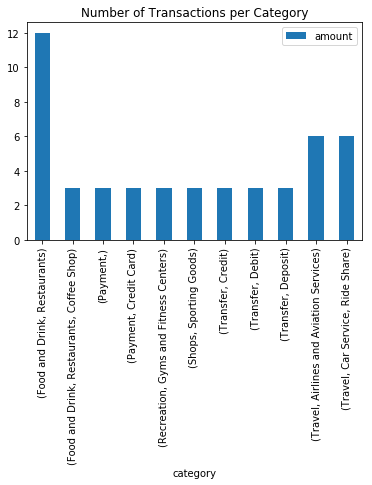

In [81]:
# Change category column to count the amount of transactions
category_spending_transactions = category_spending_df.groupby('category').count()

# Print a bar chart with the number of transactions for each category
bar_graph_title = 'Number of Transactions per Category'
category_spending_transactions.plot(kind='bar', title=bar_graph_title)

# Save image of chart
plt.savefig('category_spending_transactions.png', bbox_inches = 'tight')

### Calculate the expenses per month

In [27]:
# YOUR CODE HERE

# Calulate the expenses per month and print
monthly_expenses = transactions_df.groupby(transactions_df.index.month).sum()
monthly_expenses

,amount
date,
6,10638.91
7,10645.24
8,10645.24
9,506.33
